<center>

# __Customer Retention Cohort Analysis__
John "Jack" Cournoyer <br>
April 2024

<center>

---

> ## Executive Summary
> Cohort Analysis is a method of behavioral analytics that groups users, customers, or subjects into cohorts based on shared characteristics over a specific time period. This approach helps organizations track these cohorts and compare how they behave over time, rather than looking at all users as a single unit. For this analysis we will be using the customer's first sale month as the cohort characteristic. 
> ## Goal Statement
> The primary goal of this cohort analysis is to examine the retention rates of new customers acquired each month. By analyzing the engagement and ongoing patronage we aim to assess and understand the dynamics of customer loyalty and retention.This insight is crucial for evaluating the effectiveness of our customer acquisition and retention strategies and will help guide improvements in these areas. 
>
> 
> ## Data Sources and Methodology
> Leveraging a constructed dataset that simulates sales transactions, more specifically new customer sales. This project focuses on visualizing cohorts based on heatmaps to show decay in retention over time. 
> 
---


### __Step 1:__ Importing Essential Libraries
---
> This initial step involves importing the necessary libraries, essential for our data analysis and visualization tasks. A confirmation message will appear once these libraries are successfully loaded, ensuring they're ready for use.

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
import tabulate

print("Libraries Imprted Successfully")

Libraries Imprted Successfully


### __Step 2:__ Loading Data
---
> Following the import of essential libraries, we leverage pandas to read the CSV file and transform it into a DataFrame. This process is encapsulated within a function that verifies the successful data import through print statements, ensuring the data path is correctly accessed and ready for analysis.

In [196]:
# Loading and initial data processing
def load_and_prepare_data(file_path):
    print("Loading and preparing data...")
    # Load data
    data = pd.read_csv(file_path)

    # Convert month_year to datetime
    data["month_year"] = pd.to_datetime(data["month_year"], format="%Y-%m")

    # Sort by customer_id and month_year
    data.sort_values(by=["customer_id", "month_year"], inplace=True)
    print("Data loaded and prepared successfully!")
    return data


# Assuming the path to the file
file_path = "Customer Cohort Analysis Raw Data.csv"

# Load and prepare data (this call will be commented out after writing)
df = load_and_prepare_data(file_path)

Loading and preparing data...
Data loaded and prepared successfully!


### __Step 3:__ Ensuring Data Quality
---
> This crucial phase involves scrutinizing the dataset for null entries and duplicate records. High-quality data is paramount for reliable analysis; thus, identifying and addressing these issues is essential. We'll methodically search for and rectify null values to ensure completeness, and remove any duplicates to maintain data integrity. This process not only cleanses our dataset but also reinforces its accuracy and trustworthiness

In [197]:
# review the first 10 rows of the data to understand the structure
print("First 10 rows of the dataframe:")
tablefmt = "rounded_grid"
print(
    tabulate.tabulate(
        df.head(10),
        headers="keys",
        tablefmt=tablefmt,
        showindex=False,
        numalign="center",
        stralign="center",
    )
)

First 10 rows of the dataframe:
╭───────────────┬───────────────┬─────────────────────╮
│  customer_id  │  revenue_sum  │     month_year      │
├───────────────┼───────────────┼─────────────────────┤
│  000c076c39   │     1860      │ 2021-01-01 00:00:00 │
├───────────────┼───────────────┼─────────────────────┤
│  000c076c39   │    3908.52    │ 2021-02-01 00:00:00 │
├───────────────┼───────────────┼─────────────────────┤
│  000c076c39   │    3610.52    │ 2021-03-01 00:00:00 │
├───────────────┼───────────────┼─────────────────────┤
│  000c076c39   │     3540      │ 2021-04-01 00:00:00 │
├───────────────┼───────────────┼─────────────────────┤
│  000c076c39   │     3028      │ 2021-05-01 00:00:00 │
├───────────────┼───────────────┼─────────────────────┤
│  000c076c39   │    6838.88    │ 2021-06-01 00:00:00 │
├───────────────┼───────────────┼─────────────────────┤
│  000c076c39   │     2320      │ 2021-07-01 00:00:00 │
├───────────────┼───────────────┼─────────────────────┤
│  000c076c39   

In [198]:
# Check for null values
print("Null Count:")
print("-----------------------")
print(df.isnull().sum())
# check for duplicates
print("-----------------------")
print("Duplicate Count:")
print(df.duplicated().sum())
print("-----------------------")
# print the data types of the columns
print("Data Types:")
print(df.dtypes)

Null Count:
-----------------------
customer_id    0
revenue_sum    0
month_year     0
dtype: int64
-----------------------
Duplicate Count:
0
-----------------------
Data Types:
customer_id            object
revenue_sum           float64
month_year     datetime64[ns]
dtype: object


### __Step 4:__ Calculate Monthly Cohorts
---

> Before we visualize the results of our analysis, we need to establish the foundational data structure—monthly cohort groups. These groups are essential for tracking and comparing customer behavior over time. Below is the function to calculate the necessary cohort data.


In [199]:
def calculate_cohort_data(df):
    # Assume 'month_year' is in the format 'YYYY-MM' and 'customer_id' is present
    df["month_year"] = pd.to_datetime(df["month_year"], format="%Y-%m")
    df["CohortMonth"] = df.groupby("customer_id")["month_year"].transform("min")
    df["CohortIndex"] = (
        (df["month_year"].dt.year - df["CohortMonth"].dt.year) * 12
        + (df["month_year"].dt.month - df["CohortMonth"].dt.month)
        + 1
    )
    cohort_data = (
        df.groupby(["CohortMonth", "CohortIndex"])["customer_id"]
        .nunique()
        .reset_index()
    )
    cohort_counts = cohort_data.pivot(
        index="CohortMonth", columns="CohortIndex", values="customer_id"
    )
    cohort_sizes = cohort_counts.iloc[:, 0]
    retention = cohort_counts.divide(cohort_sizes, axis=0)

    # Calculate the minimum and maximum retention rates for each cohort
    min_retention = retention.min(axis=1)
    max_retention = retention.max(axis=1)

    return retention, min_retention, max_retention

### __Step 5:__ Visualize Monthly Cohorts
---

> After establishing our monthly cohort groups, the next critical step is to visualize these cohorts to better understand customer retention over time. The visualization focuses on displaying retention rates in a heatmap format, segmented by the year of the cohort's start.


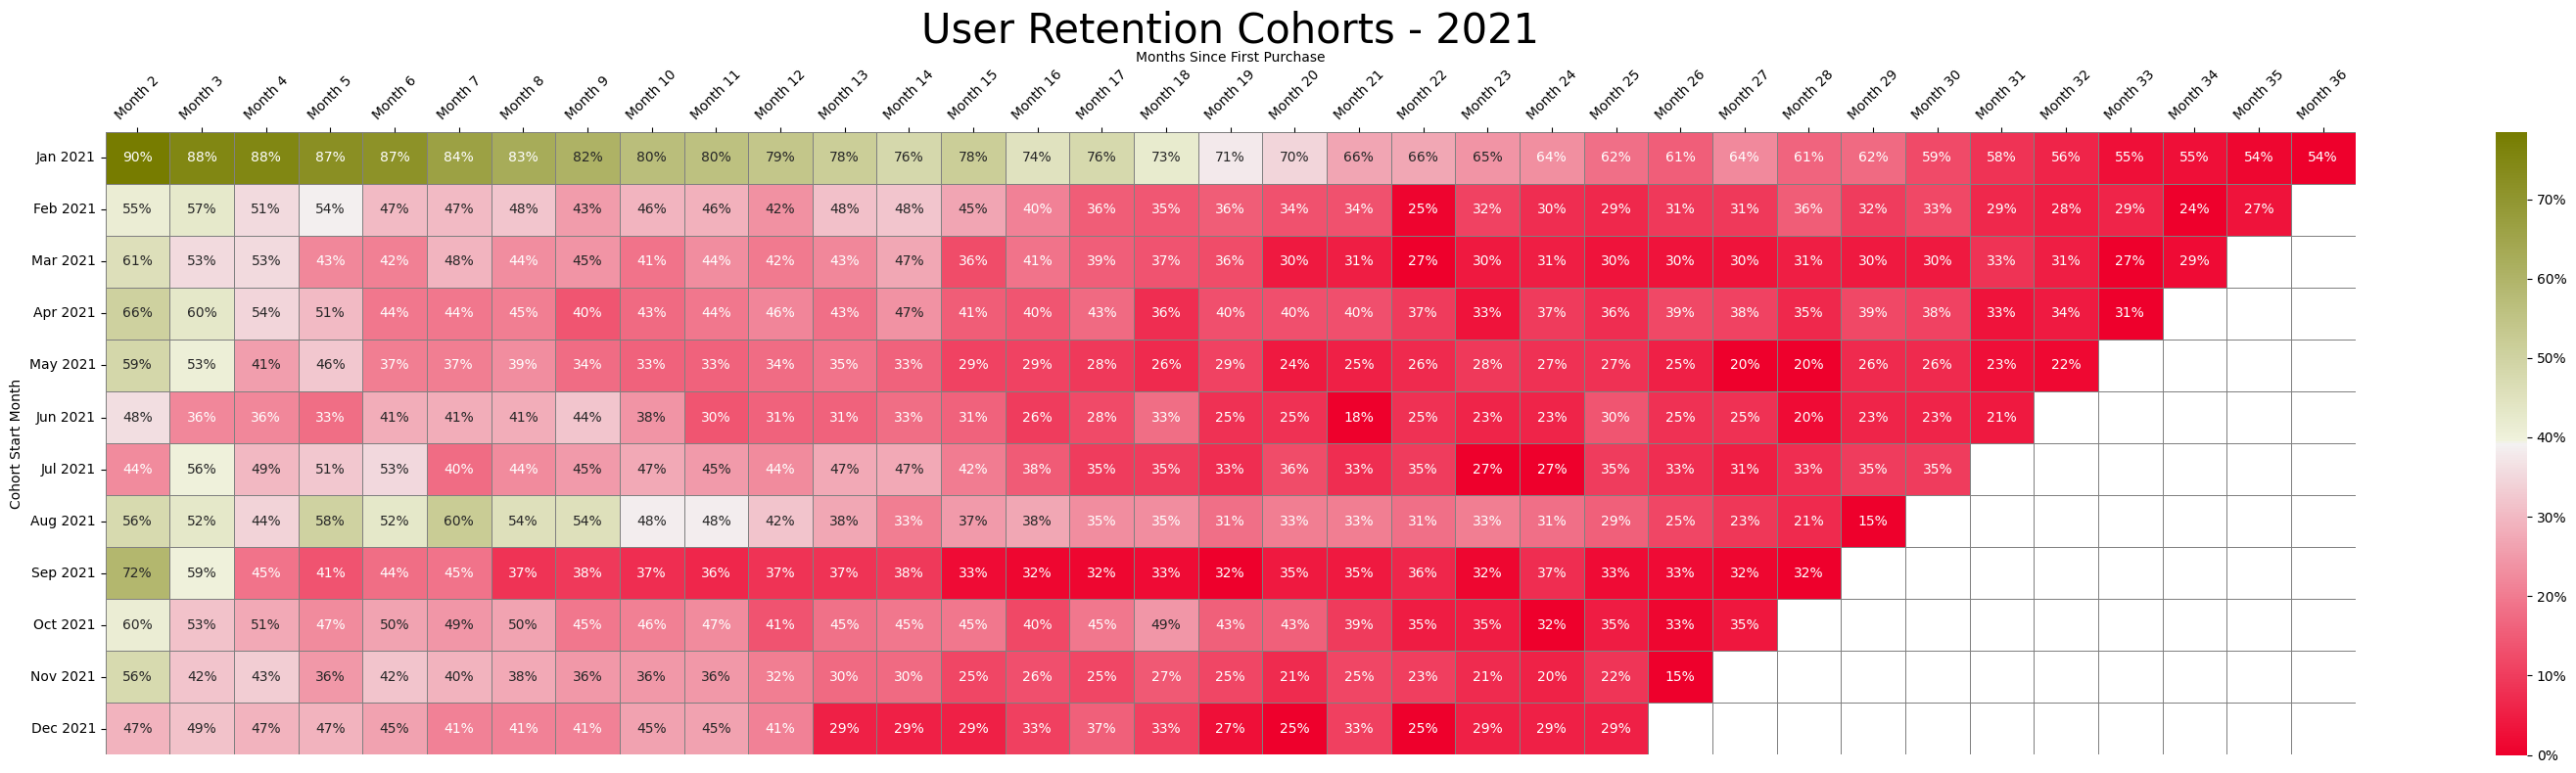

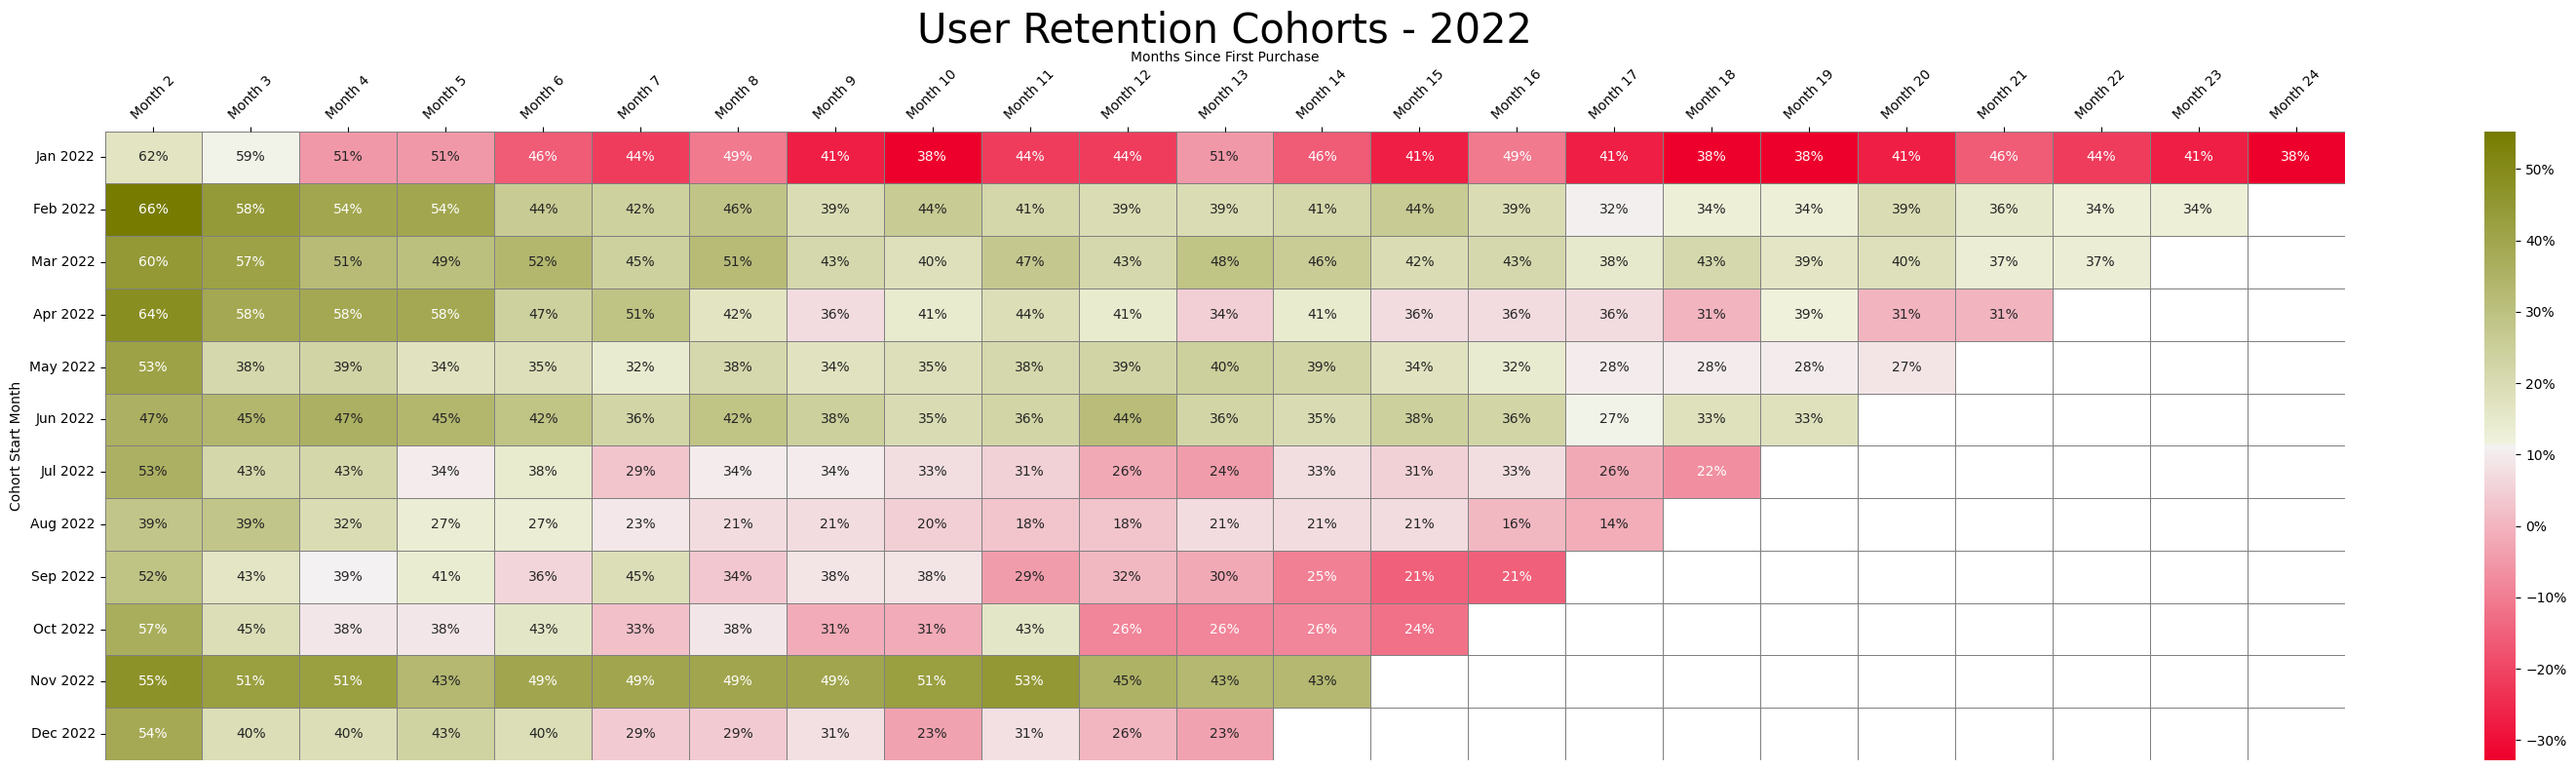

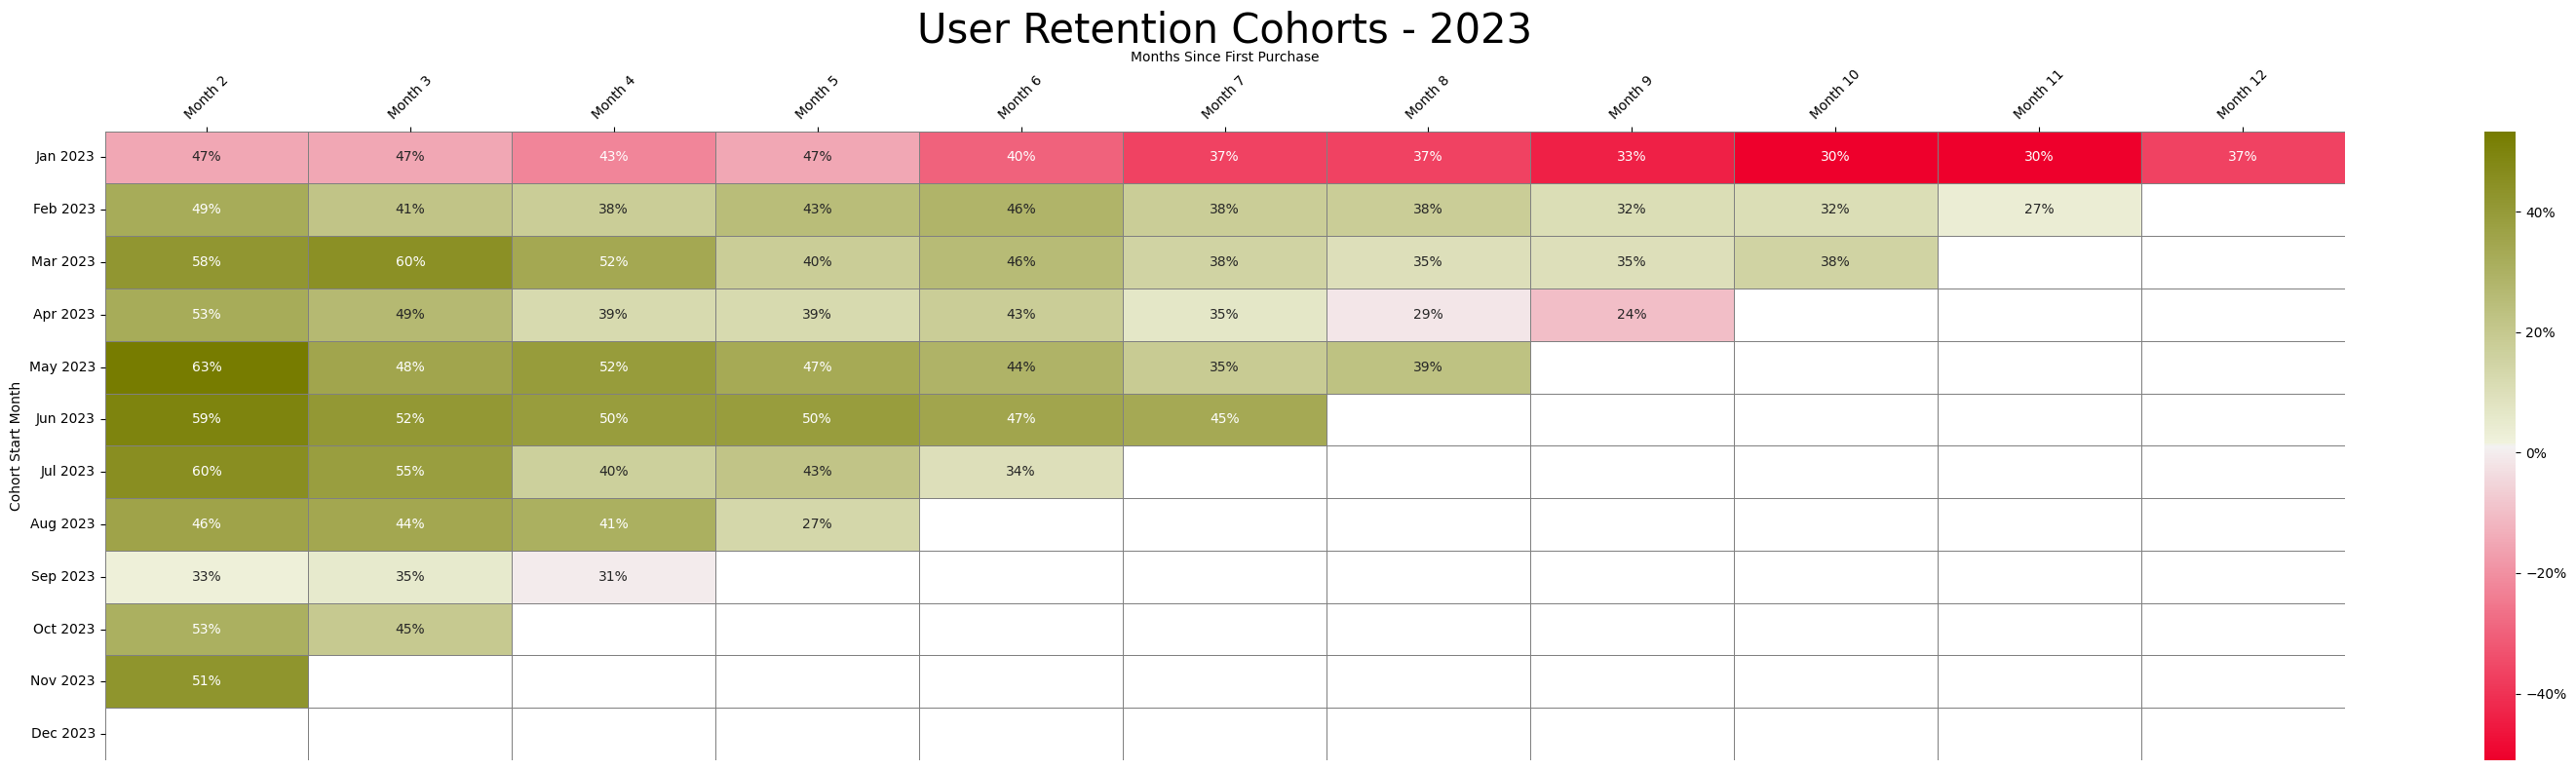

In [200]:
def plot_yearly_retention_matrices(retention_matrix, min_retention, max_retention):
    # create the CohortYear column
    retention_matrix["CohortYear"] = retention_matrix.index.year

    # Plot for each year
    for year in sorted(retention_matrix["CohortYear"].unique()):
        plt.figure(figsize=(30, 8))
        # Filter for the year
        data_for_year = retention_matrix[retention_matrix["CohortYear"] == year]

        # Drop the 'CohortYear' column to avoid confusion
        data_for_year = data_for_year.drop(columns="CohortYear")

        # Find the last non-NaN column for the year to determine the actual number of months
        last_month = data_for_year.apply(
            lambda row: row.last_valid_index(), axis=1
        ).max()
        last_month_index = data_for_year.columns.tolist().index(last_month)

        # Create a normalized retention matrix for each row and combine them into a single heatmap
        heatmap = np.zeros_like(
            data_for_year.iloc[:, 1 : last_month_index + 1], dtype=np.float64
        )
        for i in range(data_for_year.shape[0]):
            row = data_for_year.iloc[
                i, 1 : last_month_index + 1
            ]  # Start from second month
            heatmap[i] = (row - min_retention[i]) / (
                max_retention[i] - min_retention[i]
            )

        # Plot the heatmap
        ax = sns.heatmap(
            heatmap,
            annot=data_for_year.iloc[
                :, 1 : last_month_index + 1
            ],  # Start from second month
            fmt=".0%",
            cmap=sns.diverging_palette(
                h_neg=10, h_pos=90, s=100, l=50, center="light", as_cmap=True
            ),
            yticklabels=data_for_year.index.strftime("%b %Y"),
            xticklabels=[
                f"Month {j+1}" for j in range(1, last_month_index + 1)
            ],  # Start from Month 2
            linewidths=0.5,
            linecolor="grey",
            cbar_kws={
                "format": ticker.PercentFormatter(xmax=1)
            },  # Adjust cbar format for percentage
        )
        # Move the x-axis labels and ticks to the top
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position("top")
        plt.title(f"User Retention Cohorts - {year}")
        plt.xlabel("Months Since First Purchase")
        plt.ylabel("Cohort Start Month")
        plt.yticks(rotation=0)
        plt.xticks(rotation=45)
        # increase the font size of the title
        plt.title(f"User Retention Cohorts - {year}", fontsize=30)

        plt.tight_layout()  # Adjust layout
        plt.show()


# Perform Cohort Analysis
retention_matrix, min_retention, max_retention = calculate_cohort_data(df)

# Plot the heatmaps
plot_yearly_retention_matrices(retention_matrix, min_retention, max_retention)

# __Conclusion & Key Findings:__
---
> ## Retention Trend: 
> * There is a distinct trend of declining retention over time. For all cohorts analyzed, retention peaks in the initial months following the first purchase before diminishing steadily.
> ## Monthly Fluctuations:
> * Month-to-month retention rates are subject to fluctuations. In some instances, cohorts exhibit either an increase or stabilization in retention, which may point to the impact of external variables or the efficacy of specific company strategies.
> ## Cohort Start Month: 
> * Retention rates vary according to the cohort start month. Certain months consistently demonstrate higher initial retention, likely reflecting seasonal influences or other time-bound factors that affect user engagement.
> ## Actionable Insights:
> Engagement Strategies: 
> * Given the trend of declining retention, there's a compelling need for enhanced engagement strategies to sustain user activity. Implementing loyalty programs, providing regular updates, and maintaining targeted communication could bolster retention.
>
> Understanding Customer Dynamics:
> * The data indicates a 'honeymoon' phase in the customer lifecycle, after which there is a notable drop in engagement. Comprehending the dynamics that lead to this decline is essential for devising methods to prolong the active engagement period.
> * Analysis reveals that a specific segment of users maintains engagement over an extended period. Identifying the traits of these long-term customers is crucial to developing strategies that encourage new users to become loyal, long-standing patrons.
> ## Final Thoughts:
> * The analysis of user retention cohorts over several years has highlighted a significant pattern of diminishing engagement over time. Retention is at its apex immediately after the initial purchase, waning thereafter, which underscores a pivotal period for nurturing sustainable customer relationships. Despite the general downward trend, sporadic surges or periods of stable retention signal the influence of external pressures or successful internal initiatives, meriting deeper examination.
>
> * Seasonal trends also play a noticeable role, with some start months exhibiting a consistent pattern of higher initial retention, suggesting the presence of temporal factors affecting user retention. These findings stress the importance of strategic engagement efforts aimed at preserving user activity, including custom loyalty programs and regular, pertinent communication.
>
> * The detected 'honeymoon' phase within customer lifecycles presents an opportunity to investigate what factors could extend the duration of active user engagement. Moreover, the persistence of a fraction of users in engaging over the long haul identifies a key demographic crucial for understanding and duplicating retention triumphs. Leveraging these insights, businesses can fine-tune their strategies to not only retain users more effectively but also to convert newcomers into devoted, lasting customers.